## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Clean data
#data["Tumor Volume (mm3)"] = data["Tumor Volume (mm3)"].map("{:.2f}".format)

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = data["Mouse ID"].count()
mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_ID = data[['Mouse ID', 'Timepoint']]
dup_ID

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice2 = data["Drug Regimen"].unique()
mice2

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = data.sort_values('Tumor Volume (mm3)',ascending=True).drop_duplicates('Mouse ID',keep='last')
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
938,h428,Ketapril,Female,1,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
752,d133,Zoniferol,Male,5,30,0,45.000000,0
1753,x336,Naftisol,Female,4,29,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [6]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_mice["Mouse ID"].count()
count_mice

249

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_drug = clean_mice.groupby('Drug Regimen')
final_summary = summary_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
final_summary

# I'm not sure if we are expected to do the mathematical calculation or just using a straightfoward function.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Group data by type of Drug Regimen
Drug_grouped = clean_mice.groupby(["Drug Regimen"])

# Caluclate mean, median, variance, standard deviation, and SEM of tumor for each Drug Regimen
mean_mice = Drug_grouped["Tumor Volume (mm3)"].mean()

med_mice = Drug_grouped["Tumor Volume (mm3)"].median()

var_mice = Drug_grouped["Tumor Volume (mm3)"].var()

std_mice = Drug_grouped["Tumor Volume (mm3)"].std()

SEM_mice = Drug_grouped["Tumor Volume (mm3)"].sem()

# Create a DataFrame
summary_grouped = pd.DataFrame({"Mean": mean_mice, "Median": med_mice, "Variance":var_mice, "Std Dev": std_mice, "SEM": SEM_mice})

summary_grouped


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

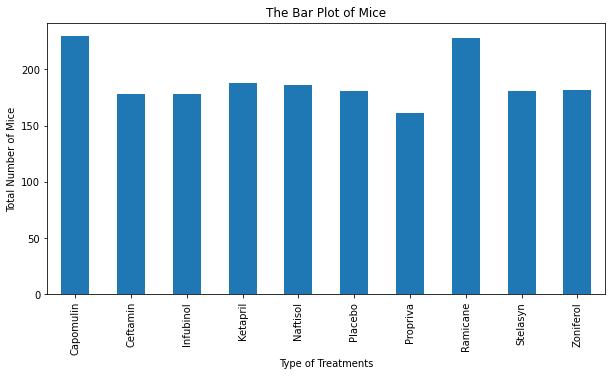

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Drug_mice = data.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
Drug_mice.plot(kind="bar", figsize=(10,5))

#label
plt.xlabel("Type of Treatments")
plt.ylabel("Total Number of Mice")
plt.title("The Bar Plot of Mice")

plt.show()

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186
Placebo                      181
Propriva                     161
Ramicane                     228
Stelasyn                     181
Zoniferol                    182


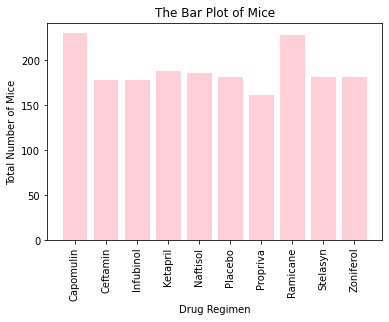

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create an array with datapoints according to Drug_mice
#array = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
# Set Location of Drug Regimen with each bar
loc = [value for value in x]

# Generate number of Drug_mice's data point
bar_mice = pd.DataFrame(Drug_mice)
#bar_mice.head(10)
x = np.arange(len(bar_mice))
print(bar_mice)

# Reset index to extract defualt value only
label = bar_mice.reset_index()

# Generate Bar plot
plt.bar(x, bar_mice['Tumor Volume (mm3)'], color='pink', alpha=0.75, align='center')
plt.xticks(loc, label['Drug Regimen'], rotation="vertical")

plt.title("The Bar Plot of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()

        Total Mice  Percentage
Sex                           
Female         124   49.799197
Male           125   50.200803


Text(0, 0.5, 'Percentage of Mice by Gender')

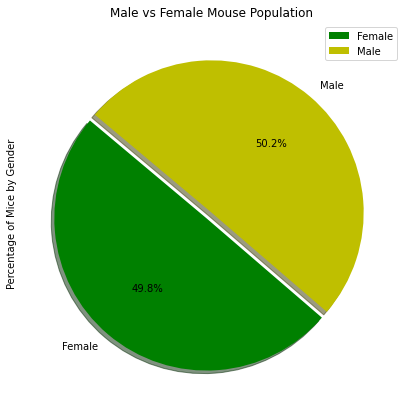

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group data by Sex
sex_mice = data.groupby(["Sex", "Mouse ID"])
sex_mice_df = pd.DataFrame(sex_mice.size())

mouse = pd.DataFrame(sex_mice_df.groupby(["Sex"]).count())
mouse.columns = ["Total Mice"]

mouse["Percentage"] = (100*(mouse["Total Mice"]/mouse["Total Mice"].sum()))
print(mouse)

# Plot pie chart uing pandas
mouse.plot.pie(y='Total Mice',figsize=(7,7), colors = ['g', 'y'], startangle=140, 
               explode = (0.05, 0), shadow = True, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Percentage of Mice by Gender')

Text(0, 0.5, 'Percentage of Mice by Gender')

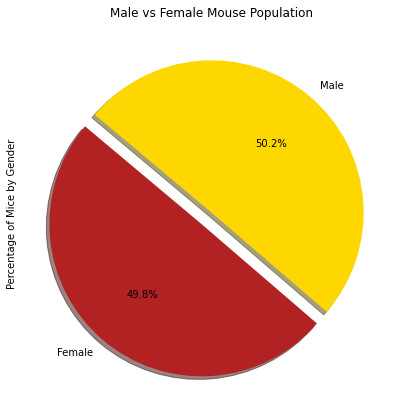

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = [mouse_metadata['Sex'].unique()]
gender_list = list(mouse.index)
gender_list

num_gender = mouse["Percentage"]
num_gender

#Set colors for each section of the pie
colors = ['firebrick', 'gold']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(7, 7))
plt.pie(num_gender, explode=(0.1, 0), labels=gender_list, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Percentage of Mice by Gender')


## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sort_4_drug = data[data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
sort_4_drug = sort_4_drug.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_sort_4 = sort_4_drug[["Drug Regimen", "Mouse ID", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]

final_sort_4

,Drug Regimen,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,16,0,45.000000
1391,Infubinol,q132,30,0,45.000000
195,Capomulin,i738,20,0,45.000000
205,Ramicane,a520,21,0,45.000000
1370,Ceftamin,p438,26,0,45.000000
...,...,...,...,...,...
350,Capomulin,v923,21,45,40.658124
144,Capomulin,m957,19,45,33.329098
337,Capomulin,j119,23,45,38.125164
59,Ramicane,s508,17,45,30.276232


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
listof4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
Capomulin_df = final_sort_4.loc[final_sort_4["Drug Regimen"] == "Capomulin",:]
Ramicane_df = final_sort_4.loc[final_sort_4["Drug Regimen"] == "Ramicane", :]
Infubinol_df = final_sort_4.loc[final_sort_4["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = final_sort_4.loc[final_sort_4["Drug Regimen"] == "Ceftamin", :]

# Create empty list to fill with tumor vol data (for plotting)
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, final_sort_4, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,b128,45,Capomulin,22,38.982878
1,b742,45,Capomulin,21,38.939633
2,f966,20,Capomulin,17,30.485985
3,g288,45,Capomulin,19,37.074024
4,g316,45,Capomulin,22,40.159220


In [94]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds


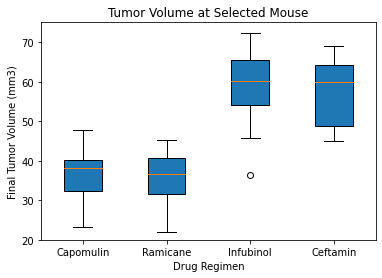

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Sort data by grouping types of drug and ID to extract the last Tumor Volume value
drug_sort = final_sort_4.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

drug_sort_df = drug_sort.to_frame()

drug_index = drug_sort_df.reset_index()
lists = drug_index.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
lists_df = pd.DataFrame(lists)
lists_df = lists_df.reindex(listof4)
input_data = [vol for vol in lists_df['Tumor Volume (mm3)']]
plt.boxplot(input_data, labels=listof4, patch_artist=True, vert=True)
plt.ylim(20, 75)
plt.title('Tumor Volume at Selected Mouse')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

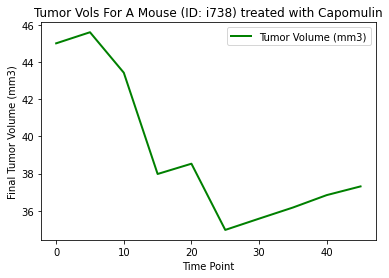

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# A mouse with ID: i738 was selected for this plot
line_cap = final_sort_4.loc[final_sort_4["Mouse ID"] == "i738",:]

line_cap_data = line_cap[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_cap_df = line_cap_data.reset_index()

plot_cap = line_cap_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

plot_cap.plot('Timepoint', 'Tumor Volume (mm3)', linewidth=2, markersize=15, color="green")
plt.title('Tumor Vols For A Mouse (ID: i738) treated with Capomulin')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Time Point')
plt.show()

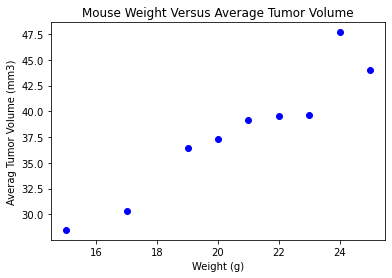

In [97]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_cap = Capomulin_merge.groupby(["Mouse ID"]).mean()

scatter_cap_sorted = scatter_cap.sort_values(["Weight (g)"], ascending=True)

scatter_plot = scatter_cap_sorted.reset_index()

avg_scatter = scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

final_scatter = pd.DataFrame(avg_scatter).reset_index()

plt.scatter(final_scatter['Weight (g)'], final_scatter['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [98]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(final_scatter['Weight (g)'],final_scatter['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume is {correlation}")

The correlation coefficient for mouse weight and average tumor volume is 0.95


In [99]:
# Calculate linear regression model 
linear_reg = st.linregress(final_scatter['Weight (g)'],final_scatter['Tumor Volume (mm3)'])
pprint(linear_reg)

LinregressResult(slope=1.7450323228831681, intercept=2.002064024335162, rvalue=0.9503881112220832, pvalue=8.530042896456064e-05, stderr=0.21587724251024673)


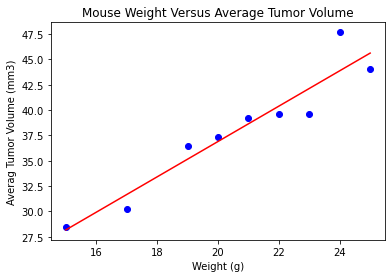

In [100]:
#based on previous calculation
slope = 1.7450323228831681
intercept = 2.002064024335162

new_weight = final_scatter['Weight (g)']*slope + intercept

#plot scatter with line-reg
plt.plot(final_scatter['Weight (g)'], new_weight, color="red")
plt.scatter(final_scatter['Weight (g)'], final_scatter['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()